<a href="https://colab.research.google.com/github/dunyashina/ohwowitsrepository/blob/main/%D0%A0%D0%98_481223_%D0%94%D1%83%D0%BD%D1%8F%D1%88%D0%B8%D0%BD%D0%B0_%D0%9C%D0%B0%D1%80%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

**Реализовать алгоритм K ближайших соседей**  для классификации:

*    Создать искуственный набор данных из 100 наблюдений с 3 классами.
*   Реализовать функцию, которая получает на вход тренировочный и тестовый наборы данных и $k$ - количество ближайших соседей, и возвращает метки тестового набора данных
*   Использовать евклидову меру
*    Если возникнет неопределенность (например, все три соседа имею разные метки классов), то присвоить класс случайным образом
*    Проверить качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой Accuracy (доля правильных ответов)
    Построить разделающие поверхности классификатора Алгоритм к ближайших соседей:


Для каждого объекта тестового набора данных:

*   вычисление расстояний между всеми объектами тренировочного набора;
*   определение $k$ наименьших расстояний;
*   определение классов для $k$ найденных объектов;
*   присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.


**Во время выполнения данного задания были использованы следующие источники**: 
https://github.com/julia-komleva/ml-course-2021/blob/main/01_knn.ipynb
https://russianblogs.com/article/54801439499/
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [55]:
from abc import ABC, abstractmethod
from collections import Counter
import numpy as np
import pandas as pd
import random

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [57]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, 
                  cluster_std = 2, random_state=17)

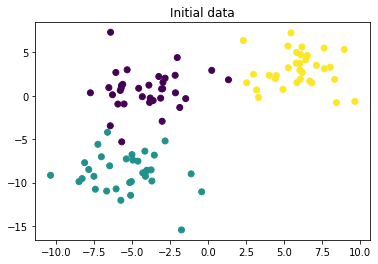

In [58]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data');


In [59]:
from math import sqrt

def euclidean_distance(x0, x1):
    return sqrt(np.sum((x0 - x1) ** 2))
    

In [60]:
def accuracy(pred, real):
  counter = 0;
  for i in range(pred.shape[0]):
    if pred[i] == real[i]:
      counter += 1
  return counter / pred.shape[0]

In [61]:
from collections import Counter
def N(x_train, y_train, x_test, k):
    pred_labels = []
    for test_point in x_test:
        distances = []
        for train_point in x_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        distances = np.asarray(distances)
        counter = Counter(y_train[distances.argsort()[:k]])
        prediction = counter.most_common()[0][0]
        pred_labels.append(prediction)    
    return pred_labels

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,
                                                   random_state=42)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

def accuracy(y_test, y_pred):
  return np.sum(y_test == y_pred) / len(y_pred)

def draw_class_border(clf, X, Y, k, h=.05, cmap=plt.cm.coolwarm):
  x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
  y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(7,7))
  plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
  plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=cmap)
  plt.title(f"k = {k}")
  plt.show()

Accuracy score самодельной функции для k = 1: 0.96
Accuracy score классификатора из sklearn для k = 1: 0.96


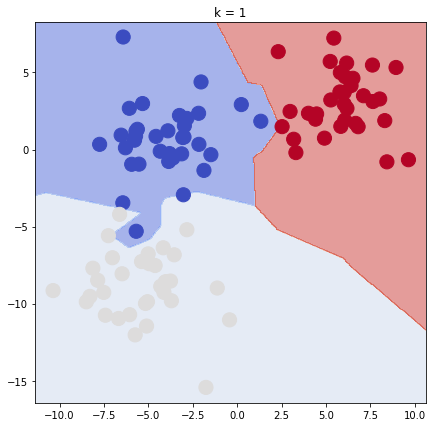

Accuracy score самодельной функции для k = 3: 1.0
Accuracy score классификатора из sklearn для k = 3: 1.0


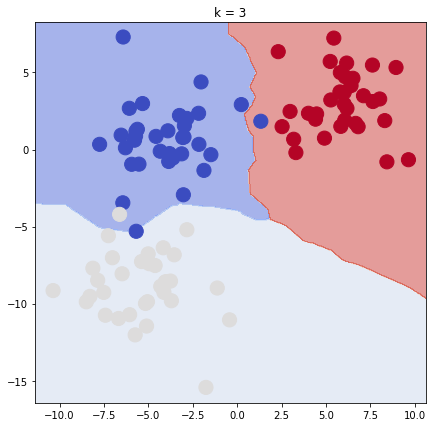

Accuracy score самодельной функции для k = 5: 1.0
Accuracy score классификатора из sklearn для k = 5: 1.0


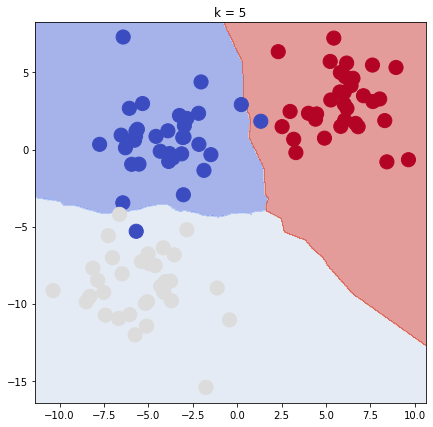

Accuracy score самодельной функции для k = 7: 1.0
Accuracy score классификатора из sklearn для k = 7: 1.0


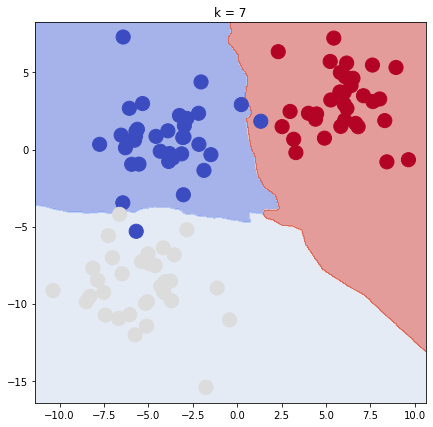

Accuracy score самодельной функции для k = 9: 1.0
Accuracy score классификатора из sklearn для k = 9: 1.0


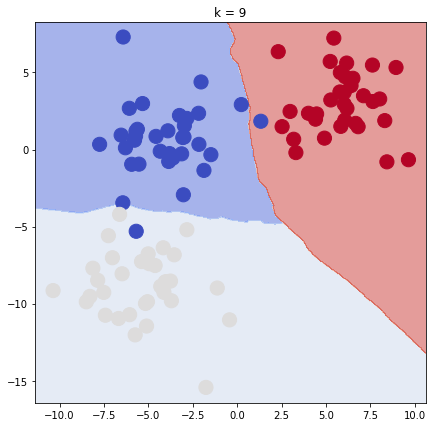

In [64]:
ks = [1, 3, 5, 7, 9]
for k in ks:
    print(f"Accuracy score самодельной функции для k = {k}: {accuracy(y_test, N(x_train, y_train, x_test, k))}")
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f"Accuracy score классификатора из sklearn для k = {k}: {accuracy(y_test, y_pred)}")
    draw_class_border(clf, X, Y, k)


## Задание 2

Реализуйте алгоритм K ближайших соседей для регрессии.

*    создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренировочную выборку.
*    предскажите функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.
*    постройте на одном графике исходную функцию, тренировочные объекты и предсказанные для каждого значения $k$. $y = sin(x)$

Алгоритм регрессии:

Для каждого тестового обекта:

*    вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
*    нахождение $k$ объектов с минимальными расстояниями;
*    вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.


In [65]:
np.random.seed(42)

X_real = np.linspace(start=0, stop=5, num=100)
y_real = np.sin(X_real)

X_train = np.random.choice(X_real, size=10, replace=False)
y_train = np.sin(X_train)

In [66]:
class KNeighborsRegressor(BaseEstimator):

  def __init__(self, k=3, seed=42):
    self.k = k
    self.seed = seed

  def _euclidean_distance(self, obj, data):
    return np.sqrt(np.sum((obj - data) ** 2, axis=1))

  def _classify(self, obj):
    random.seed(self.seed)
    distances = self._euclidean_distance(obj, self.data)
    nearest_indexes = distances.argsort()[:self.k]
    candidates = self.target[nearest_indexes]
   
    pred_target = np.mean(candidates)

    return pred_target

  def fit(self, data, target):
    if len(data.shape) < 2:
      self.data = np.expand_dims(data, axis=1)
    else:
      self.data = data

    self.target = target

  def predict(self, predSample):
    preds = []

    for obj in predSample:
      preds.append(self._classify(obj))

    return np.array(preds)

In [53]:
def draw():
  plt.title(f"k = {n_reg.k}")
  plt.plot(X_real, y_real)
  plt.scatter(X_train, y_train, label='train')
  plt.plot(X_real, y_pred)
  plt.legend()
  plt.show()

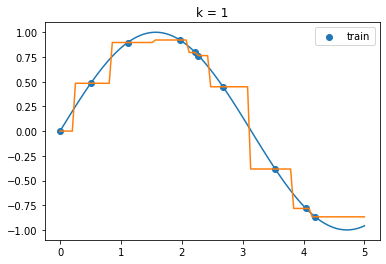

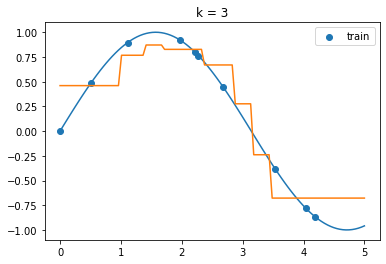

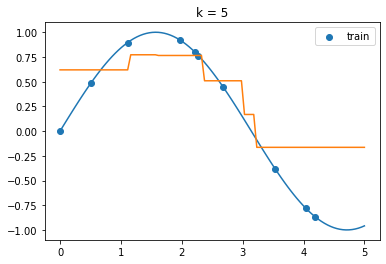

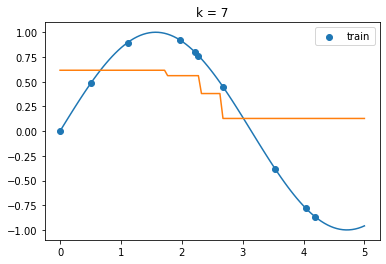

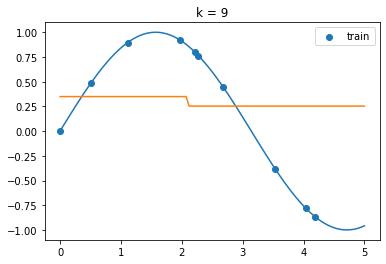

Готово.


In [54]:
ks = [1, 3, 5, 7, 9]
for k in ks:
  knn_reg = KNeighborsRegressor(k=k)
  knn_reg.fit(X_train, y_train)
  y_pred = knn_reg.predict(X_real)

  draw()
print("Готово.")